## 54 - NDBC Time Series with Siphon

Watch video: [YouTube](https://www.youtube.com/watch?v=ovqlYlI7l5A)

**NDBC**, or The National Data Buoy Center, operates as the primary source for real-time meteorological and oceanographic data collected from a network of buoys and coastal stations. NDBC's mission revolves around providing accurate and timely environmental information to support weather forecasting, marine navigation, coastal management, and scientific research.

The data is available at https://www.ndbc.noaa.gov/.

In [1]:
from siphon.simplewebservice.ndbc import NDBC
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [10]:
data_avalable = NDBC.buoy_data_types('41002')
data_avalable

{'txt': 'standard meteorological data',
 'spec': 'spectral wave summaries',
 'data_spec': 'raw spectral wave data',
 'swdir': 'spectral wave data (alpha1)',
 'swdir2': 'spectral wave data (alpha2)',
 'swr1': 'spectral wave data (r1)',
 'swr2': 'spectral wave data (r2)',
 'supl': 'supplemental measurements data'}

In [2]:
df = NDBC.realtime_observations('41002')
df.head()

,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,air_temperature,water_temperature,dewpoint,visibility,3hr_pressure_tendency,water_level_above_mean,time
0,10.0,7.0,10.0,4.5,13.0,9.5,23.0,1017.8,18.9,23.3,14.7,NaN,NaN,NaN,2024-03-26 05:20:00+00:00
1,10.0,7.0,10.0,4.5,NaN,9.5,23.0,1017.9,18.9,23.3,14.6,NaN,NaN,NaN,2024-03-26 05:10:00+00:00
2,10.0,6.0,9.0,NaN,NaN,NaN,NaN,1017.9,19.0,23.3,14.8,NaN,0.0,NaN,2024-03-26 05:00:00+00:00
3,360.0,7.0,10.0,4.4,12.0,9.3,23.0,1018.0,19.1,23.3,15.1,NaN,NaN,NaN,2024-03-26 04:50:00+00:00
4,10.0,7.0,10.0,NaN,NaN,NaN,NaN,1018.0,19.1,23.3,14.7,NaN,NaN,NaN,2024-03-26 04:40:00+00:00


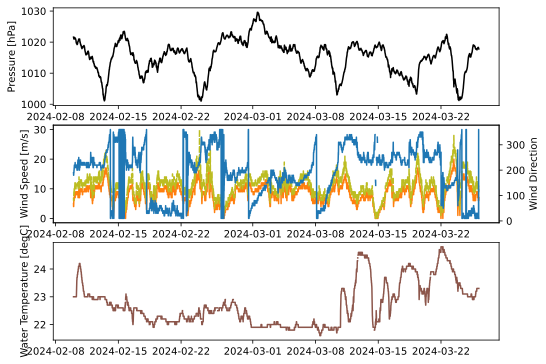

In [9]:
fig, (ax1, ax2a, ax3) = plt.subplots(3, 1, figsize=(8, 6))
ax2b = ax2a.twinx()

# Pressure
ax1.plot(df['time'], df['pressure'], color='black')
ax1.set_ylabel('Pressure [hPa]')

# Wind speed, gust, direction
ax2a.plot(df['time'], df['wind_speed'], color='tab:orange')
ax2a.plot(df['time'], df['wind_gust'], color='tab:olive', linestyle='--')
ax2b.plot(df['time'], df['wind_direction'], color='tab:blue', linestyle='-')
ax2a.set_ylabel('Wind Speed [m/s]')
ax2b.set_ylabel('Wind Direction')

# Water temperature
ax3.plot(df['time'], df['water_temperature'], color='tab:brown')
ax3.set_ylabel('Water Temperature [degC]')

plt.show()